##   ارتباطات البيانات

In [18]:
#تحميل البيانات
import pandas as pd
import numpy as np
df= pd.read_csv("../data/HousePrice1.csv")

In [19]:
# المتغيرات الرقمية
num_features= df.select_dtypes(include="number")
num_features.dtypes

Unnamed: 0        int64
Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
PoolArea          int64
MiscVal           int64
YrSold            int64
SalePrice         int64
TotalSF           int64
TotalPorchSF      int64
TotalBath       float64
SnMoSold        float64
CsMoSold        float64
dtype: object

In [20]:
df.shape

(1460, 76)

In [21]:
df.select_dtypes(include="number").columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'PoolArea', 'MiscVal', 'YrSold', 'SalePrice', 'TotalSF', 'TotalPorchSF',
       'TotalBath', 'SnMoSold', 'CsMoSold'],
      dtype='object')

In [22]:
# ترتيب درجة الارتباط
cormat=np.abs(num_features.corr()["SalePrice"]).sort_values(ascending=False)
cormat

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.778959
GarageCars      0.640409
TotalBath       0.631731
GarageArea      0.623431
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
LotArea         0.263843
BsmtUnfSF       0.214479
TotalPorchSF    0.195739
BedroomAbvGr    0.168213
KitchenAbvGr    0.135907
PoolArea        0.092404
MSSubClass      0.084284
OverallCond     0.077856
SnMoSold        0.055101
CsMoSold        0.036300
YrSold          0.028923
LowQualFinSF    0.025606
Unnamed: 0      0.021917
Id              0.021917
MiscVal         0.021190
BsmtFinSF2      0.011378
Name: SalePrice, dtype: float64

In [23]:
# المتغيرات الأكثر ارتباطا بالمتغير الهدف
cormat[cormat>.6]

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.778959
GarageCars     0.640409
TotalBath      0.631731
GarageArea     0.623431
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [24]:
# اكبر 7 ارتباطات
cormat.nlargest(7)

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.778959
GarageCars     0.640409
TotalBath      0.631731
GarageArea     0.623431
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [25]:
# الاقتصار على المتغيرات الأكثر ارتباطا
df[["OverallQual", "TotalSF","GarageCars","TotalBath","GarageArea","1stFlrSF","SalePrice"]].corr()

,OverallQual,TotalSF,GarageCars,TotalBath,GarageArea,1stFlrSF,SalePrice
OverallQual,1.000000,0.664830,0.600671,0.541063,0.562022,0.476224,0.790982
TotalSF,0.664830,1.000000,0.529608,0.600509,0.558466,0.797678,0.778959
GarageCars,0.600671,0.529608,1.000000,0.483578,0.882475,0.439317,0.640409
TotalBath,0.541063,0.600509,0.483578,1.000000,0.451567,0.390557,0.631731
GarageArea,0.562022,0.558466,0.882475,0.451567,1.000000,0.489782,0.623431
1stFlrSF,0.476224,0.797678,0.439317,0.390557,0.489782,1.000000,0.605852
SalePrice,0.790982,0.778959,0.640409,0.631731,0.623431,0.605852,1.000000


In [26]:
cormat_col= cormat.nlargest(7).index
cormat_col

Index(['SalePrice', 'OverallQual', 'TotalSF', 'GarageCars', 'TotalBath',
       'GarageArea', '1stFlrSF'],
      dtype='object')

In [31]:
df[cormat_col].corr()

,SalePrice,OverallQual,TotalSF,GarageCars,TotalBath,GarageArea,1stFlrSF
SalePrice,1.000000,0.790982,0.778959,0.640409,0.631731,0.623431,0.605852
OverallQual,0.790982,1.000000,0.664830,0.600671,0.541063,0.562022,0.476224
TotalSF,0.778959,0.664830,1.000000,0.529608,0.600509,0.558466,0.797678
GarageCars,0.640409,0.600671,0.529608,1.000000,0.483578,0.882475,0.439317
TotalBath,0.631731,0.541063,0.600509,0.483578,1.000000,0.451567,0.390557
GarageArea,0.623431,0.562022,0.558466,0.882475,0.451567,1.000000,0.489782
1stFlrSF,0.605852,0.476224,0.797678,0.439317,0.390557,0.489782,1.000000


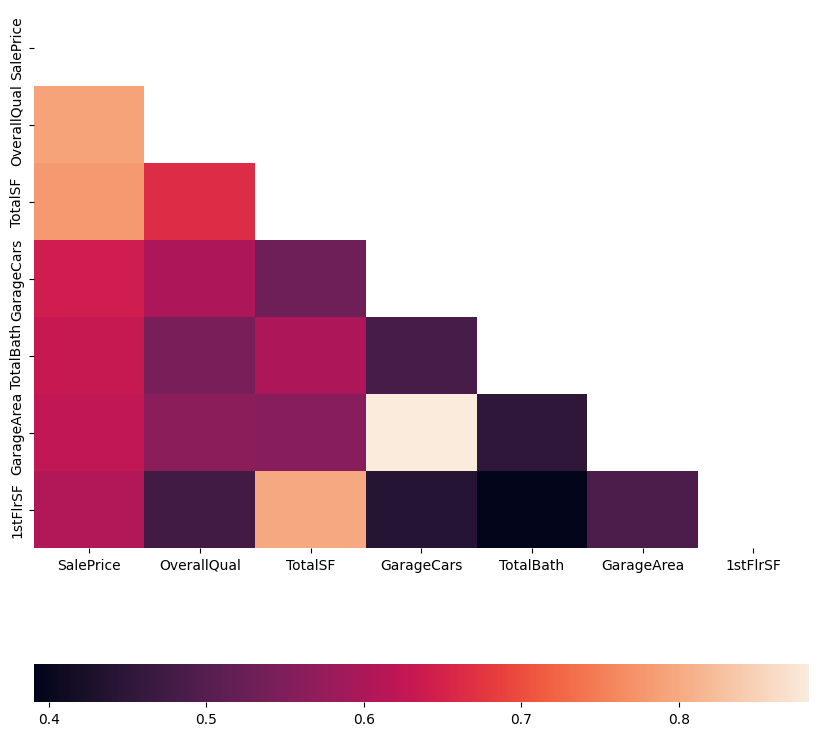

In [33]:
# مصفوفة الارتباطات
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
df_cor=df[cormat_col].corr()

matrix=np.triu(df_cor)
_=sns.heatmap(df_cor, mask=matrix,  cbar_kws={"orientation": "horizontal"})

-  OverallQual  & GrLivArea   with respectively   0.79 and       0.71 are toppping aall other featuers

In [ ]:
#  OverallQual  قيم المتغير
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [ ]:
#  pivolt table  for median SalePrice regarding     OverallQual
#OverallQual جدول تحديد الوسيط لتصنيفات المتغير
median_SalePrice_OvalQ= pd.pivot_table(df, index="OverallQual", values="SalePrice" , aggfunc="median")
median_SalePrice_OvalQ

,SalePrice
OverallQual,
1,10.799
2,11.002
3,11.365
4,11.590
5,11.798
6,11.983
7,12.207
8,12.505
9,12.751
